The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, it's essential to understand the growth trends in charging facilities and sales to inform strategic planning. As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. The data is stored in two CSV files:
___

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in CSV Files
private_ev_charging_df = pd.read_csv('private_ev_charging.csv')
public_ev_charging_df = pd.read_csv('public_ev_charging.csv')
ev_sales_df = pd.read_csv('ev_sales.csv')

# Inspect Data
display(private_ev_charging_df.info(), private_ev_charging_df.head())
display(public_ev_charging_df.info(), public_ev_charging_df.head())
display(ev_sales_df.info(), ev_sales_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       9 non-null      int64
 1   private_ports              9 non-null      int64
 2   private_station_locations  9 non-null      int64
dtypes: int64(3)
memory usage: 348.0 bytes


None

,year,private_ports,private_station_locations
0,2014,3695,1825
1,2015,4150,1962
2,2016,5763,2331
3,2017,6048,2370
4,2018,6812,2489


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   year                      10 non-null     int64
 1   public_ports              10 non-null     int64
 2   public_station_locations  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


None

,year,public_ports,public_station_locations
0,2013,16619,6938
1,2014,22470,9207
2,2015,26532,10710
3,2016,33165,13150
4,2017,45789,16170


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Vehicle  495 non-null    object 
 1   year     495 non-null    int64  
 2   sales    241 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.7+ KB


None

,Vehicle,year,sales
0,Chevy Volt,2011,7671.0
1,Chevy Volt,2012,23461.0
2,Chevy Volt,2013,23094.0
3,Chevy Volt,2014,18805.0
4,Chevy Volt,2015,15393.0


In [2]:
# Combine the public and private charging port dataframes on year
df_combined = public_ev_charging_df.merge(private_ev_charging_df, on='year', how='outer', indicator=True)

# Subset by including only rows with complete data and drop indicator column
df_temp = df_combined[df_combined['_merge'] == 'both']
df_temp = df_temp.drop(columns=['_merge'])

# Inspect DF 
display(df_temp.info())
display(df_temp)

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1 to 9
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       9 non-null      int64  
 1   public_ports               9 non-null      int64  
 2   public_station_locations   9 non-null      int64  
 3   private_ports              9 non-null      float64
 4   private_station_locations  9 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 432.0 bytes


None

,year,public_ports,public_station_locations,private_ports,private_station_locations
1,2014,22470,9207,3695.0,1825.0
2,2015,26532,10710,4150.0,1962.0
3,2016,33165,13150,5763.0,2331.0
4,2017,45789,16170,6048.0,2370.0
5,2018,56842,19893,6812.0,2489.0
6,2019,73838,23282,9955.0,3078.0
7,2020,96190,28602,10647.0,2768.0
8,2021,114451,46407,18867.0,4074.0
9,2022,136513,53764,19993.0,4435.0


In [3]:
# Calculate # Vehicles sold per year and reset index of group by for data frame operations
vehicles_sold_each_year = ev_sales_df.groupby('year')['sales'].sum().reset_index()

# Merge the temporary dataframe with the number of cars sold per year 
df_complete = df_temp.merge(vehicles_sold_each_year, on='year', how='left')

# Drop rows with missing data
df_complete = df_complete.dropna(subset='sales')

# Inspect DF
display(vehicles_sold_each_year)
display(df_complete)

,year,sales
0,2011,17763.0
1,2012,53171.0
2,2013,97102.0
3,2014,118882.0
4,2015,114023.0
5,2016,159616.0
6,2017,195581.0
7,2018,361315.0
8,2019,326644.0


,year,public_ports,public_station_locations,private_ports,private_station_locations,sales
0,2014,22470,9207,3695.0,1825.0,118882.0
1,2015,26532,10710,4150.0,1962.0,114023.0
2,2016,33165,13150,5763.0,2331.0,159616.0
3,2017,45789,16170,6048.0,2370.0,195581.0
4,2018,56842,19893,6812.0,2489.0,361315.0
5,2019,73838,23282,9955.0,3078.0,326644.0


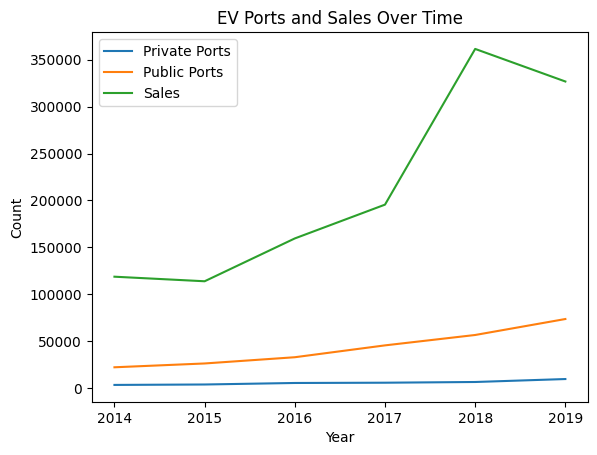

In [4]:
# Instatiate plot
fig, ax = plt.subplots()

# Create line plots for count of ports/ cars sold over relevant years
sns.lineplot(data=df_complete, x='year', y='private_ports', label='Private Ports')
sns.lineplot(data=df_complete, x='year', y='public_ports', label='Public Ports')
sns.lineplot(data=df_complete, x='year', y='sales', label='Sales')

# Set plot labels 
ax.set_title('EV Ports and Sales Over Time')
ax.set(xlabel='Year', ylabel='Count')
ax.legend()

# Show plot
plt.show()

In [5]:
# As electric vehicle sales increase, does this lead to more public or private charging ports?
solution = 'public'